# CSE474/574 - Programming Assignment 2

## Part 1 - Sentiment Analysis

In the code provided below, you need to add code wherever specified by `TODO:`. 

> You will be using a Python collection class - `Counter` to maintain the word counts. 

> See https://docs.python.org/2/library/collections.html for more details.

In [49]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [50]:
# read data files 
g = open('reviews.txt','r') # What we know!
reviews_all = list(map(lambda x:x[:-1],g.readlines()))
g.close()
g = open('labels.txt','r') # What we WANT to know!
sentiments_all = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

# load vocabulary
g = open('vocab.txt','r')
vocab = [s.strip() for s in g.readlines()]

The data is a set of 25000 movie reviews, along with a `POSITIVE` or `NEGATIVE` sentiment label assigned to the review.

In [51]:
# Check out sample reviews
print('A {} review:'.format(sentiments_all[0]))
print(reviews_all[0])
print('\nA {} review:'.format(sentiments_all[1]))
print(reviews_all[1])

A POSITIVE review:
bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   

A NEGATIVE review:
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comed

In [52]:
# split into training and test data
reviews_train,reviews_test = reviews_all[0:24000],reviews_all[24000:]
sentiments_train,sentiments_test = sentiments_all[0:24000],sentiments_all[24000:]

In [53]:
# maintain Counter objects to store positive, negative and total counts for
# all the words present in the positive, negative and total reviews.
positive_word_count = Counter()
negative_word_count = Counter()
total_counts = Counter()
# TODO: Loop over all the words in the vocabulary
# and increment the counts in the appropriate counter objects
# based on the training data
for r,n in zip(reviews_train,sentiments_train):
    
    if n=="NEGATIVE":
        r = r.split()
        for r1 in r:
            if (len(r1)>1 or r1=="a"):
                negative_word_count[r1] = negative_word_count[r1]+1
                total_counts[r1] = total_counts[r1] +1

    else:
        r = r.split()
        for r2 in r:
            if (len(r2)>1 or r2 =="a"):
                positive_word_count[r2] = positive_word_count[r2]+1
                total_counts[r2] = total_counts[r2] +1
        


In [54]:
# maintain a Counter object to store positive to negative ratios 
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        # TODO: Code for calculating the ratios (remove the next line)
        
        if(positive_word_count[term]==0 or negative_word_count[term] ==0):
            pos_neg_ratios[term] = (positive_word_count[term]+1)/(negative_word_count[term]+1)
        else:
            pos_neg_ratios[term] = positive_word_count[term]/negative_word_count[term]
#print(t


In [56]:
print("Pos-to-neg ratio for 'the' = {}".format(pos_neg_ratios["the"]))
print("Pos-to-neg ratio for 'amazing' = {}".format(pos_neg_ratios["amazing"]))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios["terrible"]))

Pos-to-neg ratio for 'the' = 1.0618582280413789
Pos-to-neg ratio for 'amazing' = 4.031496062992126
Pos-to-neg ratio for 'terrible' = 0.17256637168141592


In [57]:
# take a log of the ratio
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)
    

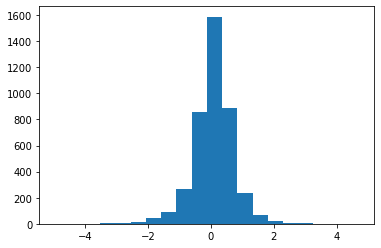

In [58]:
# visualize the distribution of the log-ratio scores
scores = np.array(list(pos_neg_ratios.values()))
vocab_selected = list(pos_neg_ratios.keys())

h = plt.hist(scores,bins=20)

The above histogram should give you an idea about the distribution of the scores.

Notice how the scores are distributed around 0. A word with score 0 can be considered as `neutral`. 

In [59]:
# Print few words with neutral score
for ind in np.where(scores == 0)[0][0:10]:
    print(vocab_selected[ind])

realize
hands
extreme
beat
onto
psycho
test
obsessed
choose
speech


**APPROACH 1** Implement a simple non-machine learning that only uses the log-ratios to determine if a review is positive or negative. This function will be applied to the test data to calculate the accuracy of the model. 

_See the assignment document for hints._

In [63]:
def nonml_classifier(review,pos_neg_ratios):
    '''
    Function that determines the sentiment for a given review.
    
    Inputs:
      review - A text containing a movie review
      pos_neg_ratios - A Counter object containing frequent words
                       and corresponding log positive-negative ratio
    Return:
      sentiment - 'NEGATIVE' or 'POSITIVE'
    '''
    # TODO: Implement the algorithm here. Change the next line.
    sentiment = 'POSITIVE'
    countp =0
    list1 = review.split()
    
    for l in list1:    
        countp = countp+pos_neg_ratios[l]
        if(countp>0):
            sentiment = 'POSITIVE'
        else:
            sentiment = 'NEGATIVE'
    return sentiment

In [64]:
predictions_test = []
for r in reviews_test:
    l = nonml_classifier(r,pos_neg_ratios)
    predictions_test.append(l)

correct = 0
for l,p in zip(sentiments_test,predictions_test):
    if l == p:
        correct = correct + 1
print('Accuracy of the model = {}'.format(correct/len(sentiments_test)))

Accuracy of the model = 0.768


**Approach 2** Implement a neural network for sentiment classification. 

> ### System Configuration
This part requires you to use a computer with `tensorflow` library installed. More information is available here - https://www.tensorflow.org.
`
You are allowed to implement the project on your personal computers using `Python 3.4 or above. You will need `numpy` and `scipy` libraries. If you need to use departmental resources, you can use **metallica.cse.buffalo.edu**, which has `Python 3.4.3` and the required libraries installed. 

> Students attempting to use the `tensorflow` library have two options: 
1. Install `tensorflow` on personal machines. Detailed installation information is here - https://www.tensorflow.org/. Note that, since `tensorflow` is a relatively new library, you might encounter installation issues depending on your OS and other library versions. We will not be providing any detailed support regarding `tensorflow` installation. If issues persist, we recommend using option 2. 
2. Use **metallica.cse.buffalo.edu**. If you are registered into the class, you should have an account on that server. The server already has Python 3.4.3 and TensorFlow 0.12.1 installed. Please use /util/bin/python for Python 3. 
3. To maintain a ssh connection for a long-running task on a remote machine, use tools like `screen`. For more information: https://linuxize.com/post/how-to-use-linux-screen/ 
4. For running jupyter-notebook over a remote machine find information on: https://fizzylogic.nl/2017/11/06/edit-jupyter-notebooks-over-ssh/
 


In [65]:
def create_input_vector(review,word2index):
    '''
    Function to count how many times each word is used in the given review,
    # and then store those counts at the appropriate indices inside x.
    '''
    vocab_size = len(word2index)
    x = np.zeros((1, vocab_size))
    for w in review.split(' '):
        if w in word2index.keys():
            x[0][word2index[w]] += 1
    return x

In [68]:
def find_ignore_words(pos_neg_ratios):
    ''' 
    Function to identify words to ignore from the vocabulary
    '''
    ignore_words = []
    # TODO: Complete the implementation of find_ignore_words
    variance = 0
    listvalues = list(pos_neg_ratios.values())
    mean = np.mean(listvalues)
    n = len(listvalues)
    for v in listvalues:
        variance = variance+((v-mean)**2)/n
    SD = np.sqrt(variance)
    for k in pos_neg_ratios:
        if(pos_neg_ratios[k]< 0.19*SD and pos_neg_ratios[k]> -0.19*SD):
            ignore_words.append(k) 
    
    '''
    ignore_words = []
    for w in pos_neg_ratios:
        if pos_neg_ratios[w]<0.5 and pos_neg_ratios[w]>-0.5:
            ignore_words.append(w)
    '''
    return ignore_words

In [69]:
# create a word2index mapping from word to an integer index
word2index = {}
ignore_words = find_ignore_words(pos_neg_ratios)
vocab_selected = list(set(vocab_selected).difference(set(ignore_words)))
for i,word in enumerate(vocab_selected):
    if word not in ignore_words:
        word2index[word] = i
vocab_size = len(word2index)

#### Generate .hdf5 files from the processed data
Given that the data is moderately large sized, the `hdf5` file format provides a more efficient file representation for further processing. See [here](https://anaconda.org/anaconda/hdf5) for more details and installation instructions.

In [70]:
import h5py

In [71]:
# Run the script once to generate the file 
# delete the exiting 'data1.hdf5' file before running it again to avoid error 
labels_train = np.zeros((len(sentiments_train), 2), dtype=int)
labels_test = np.zeros((len(sentiments_test), 2), dtype=int)

with h5py.File('data1.hdf5', 'w') as hf:
    hf.create_dataset('data_train', (labels_train.shape[0], vocab_size), np.int16)
    hf.create_dataset('data_test', (labels_test.shape[0], vocab_size), np.int16)
    # create training data
    for i,(r,l) in enumerate(zip(reviews_train, sentiments_train)):
        hf["data_train"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_train[i, 0] = 1
        else:
            labels_train[i, 1] = 1
    # create test data
    for i,(r,l) in enumerate(zip(reviews_test, sentiments_test)):
        hf["data_test"][i] = create_input_vector(r,word2index)
        # one-hot encoding
        if l == 'NEGATIVE':
            labels_test[i, 0] = 1
        else:
            labels_test[i, 1] = 1

In [72]:
import tensorflow as tf 
tf.compat.v1.random.set_random_seed(10)

In [73]:
# parameters of the network
learning_rate = 0.01
batch_size = 400
num_epochs = 50
n_input = vocab_size
n_classes = 2

In [74]:

#1layer architecture
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])
# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 10  # 1st layer number of neurons
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'out1': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out2': tf.Variable(tf.random_normal([n_classes]))
}


In [75]:
'''
#2 layer architecture
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])
#print(n_hidden_1)
print(Y)
# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 50  # 1st layer number of neurons
n_hidden_2 = 40
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
	'out1': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'b2': tf.Variable(tf.random_normal([n_hidden_2])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}
print(weights['h1'])
#print(weights['h2'])
print(weights['out1'])
'''

'\n#2 layer architecture\nX = tf.placeholder("float", [None, n_input])\nY = tf.placeholder("float", [None, n_classes])\n#print(n_hidden_1)\nprint(Y)\n# Define weights and biases in Tensorflow according to the parameters set above\nn_hidden_1 = 50  # 1st layer number of neurons\nn_hidden_2 = 40\nweights = {\n\t\'h1\': tf.Variable(tf.random_normal([n_input, n_hidden_1])),\n    \'h2\': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),\n\t\'out1\': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))\n}\nbiases = {\n\t\'b1\': tf.Variable(tf.random_normal([n_hidden_1])),\n\t\'b2\': tf.Variable(tf.random_normal([n_hidden_2])),\n\t\'out2\': tf.Variable(tf.random_normal([n_classes]))\n}\nprint(weights[\'h1\'])\n#print(weights[\'h2\'])\nprint(weights[\'out1\'])\n'

In [76]:
'''
#3 layer architecture
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])
#print(n_hidden_1)
print(Y)
# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 20  # 1st layer number of neurons
n_hidden_2 = 20
n_hidden_3 = 10
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
	'out1': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}
'''

'\n#3 layer architecture\nX = tf.placeholder("float", [None, n_input])\nY = tf.placeholder("float", [None, n_classes])\n#print(n_hidden_1)\nprint(Y)\n# Define weights and biases in Tensorflow according to the parameters set above\nn_hidden_1 = 20  # 1st layer number of neurons\nn_hidden_2 = 20\nn_hidden_3 = 10\nweights = {\n\t\'h1\': tf.Variable(tf.random_normal([n_input, n_hidden_1])),\n    \'h2\': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),\n    \'h3\': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),\n\t\'out1\': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))\n}\nbiases = {\n\t\'b1\': tf.Variable(tf.random_normal([n_hidden_1])),\n\t\'b2\': tf.Variable(tf.random_normal([n_hidden_2])),\n    \'b3\': tf.Variable(tf.random_normal([n_hidden_3])),\n\t\'out2\': tf.Variable(tf.random_normal([n_classes]))\n}\n'

In [77]:
'''
#5 layer architecture
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])
#print(n_hidden_1)
print(Y)
# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 35  # 1st layer number of neurons
n_hidden_2 = 30
n_hidden_3 = 25
n_hidden_4 = 20
n_hidden_5 = 15
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
	'out1': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}
'''

'\n#5 layer architecture\nX = tf.placeholder("float", [None, n_input])\nY = tf.placeholder("float", [None, n_classes])\n#print(n_hidden_1)\nprint(Y)\n# Define weights and biases in Tensorflow according to the parameters set above\nn_hidden_1 = 35  # 1st layer number of neurons\nn_hidden_2 = 30\nn_hidden_3 = 25\nn_hidden_4 = 20\nn_hidden_5 = 15\nweights = {\n\t\'h1\': tf.Variable(tf.random_normal([n_input, n_hidden_1])),\n    \'h2\': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),\n    \'h3\': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),\n    \'h4\': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),\n    \'h5\': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),\n\t\'out1\': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))\n}\nbiases = {\n\t\'b1\': tf.Variable(tf.random_normal([n_hidden_1])),\n\t\'b2\': tf.Variable(tf.random_normal([n_hidden_2])),\n    \'b3\': tf.Variable(tf.random_normal([n_hidden_3])),\n    \'b4\': tf.Variable(tf.random_normal([

In [78]:
'''
#3 layer architecture
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])
#print(n_hidden_1)
print(Y)
# Define weights and biases in Tensorflow according to the parameters set above
n_hidden_1 = 50  # 1st layer number of neurons
n_hidden_2 = 40
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
	'out1': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
	'out2': tf.Variable(tf.random_normal([n_classes]))
}
print(weights['h1'])
#print(weights['h2'])
print(weights['out1'])
'''

'\n#3 layer architecture\nX = tf.placeholder("float", [None, n_input])\nY = tf.placeholder("float", [None, n_classes])\n#print(n_hidden_1)\nprint(Y)\n# Define weights and biases in Tensorflow according to the parameters set above\nn_hidden_1 = 50  # 1st layer number of neurons\nn_hidden_2 = 40\nweights = {\n\t\'h1\': tf.Variable(tf.random_normal([n_input, n_hidden_1])),\n    \'h2\': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),\n    \'h3\': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),\n\t\'out1\': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))\n}\nbiases = {\n\t\'b1\': tf.Variable(tf.random_normal([n_hidden_1])),\n\t\'b2\': tf.Variable(tf.random_normal([n_hidden_2])),\n    \'b3\': tf.Variable(tf.random_normal([n_hidden_3])),\n\t\'out2\': tf.Variable(tf.random_normal([n_classes]))\n}\nprint(weights[\'h1\'])\n#print(weights[\'h2\'])\nprint(weights[\'out1\'])\n'

In [79]:

#1 layer architecture
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_1, weights['out1']) + biases['out2'])
    return out_layer


In [80]:
'''
#2 layer architecture
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']) ,biases['b2'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out1']) + biases['out2'])
    return out_layer
'''

"\n#2 layer architecture\ndef multilayer_perceptron(x):\n    # define the layers of a single layer perceptron\n    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])\n    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']) ,biases['b2'])\n    out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out1']) + biases['out2'])\n    return out_layer\n"

In [81]:
'''
#3 layer architecture
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']) ,biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']) ,biases['b3'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_3, weights['out1']) + biases['out2'])
    return out_layer
'''

"\n#3 layer architecture\ndef multilayer_perceptron(x):\n    # define the layers of a single layer perceptron\n    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])\n    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']) ,biases['b2'])\n    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']) ,biases['b3'])\n    out_layer = tf.nn.sigmoid(tf.matmul(layer_3, weights['out1']) + biases['out2'])\n    return out_layer\n"

In [82]:
'''
#5 layer architecture
def multilayer_perceptron(x):
    # define the layers of a single layer perceptron
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']) ,biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']) ,biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']) ,biases['b4'])
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']) ,biases['b5'])
    out_layer = tf.nn.sigmoid(tf.matmul(layer_5, weights['out1']) + biases['out2'])
    return out_layer
'''

"\n#5 layer architecture\ndef multilayer_perceptron(x):\n    # define the layers of a single layer perceptron\n    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])\n    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']) ,biases['b2'])\n    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']) ,biases['b3'])\n    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']) ,biases['b4'])\n    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']) ,biases['b5'])\n    out_layer = tf.nn.sigmoid(tf.matmul(layer_5, weights['out1']) + biases['out2'])\n    return out_layer\n"

In [83]:
logits = multilayer_perceptron(X)
# Define loss(softmax_cross_entropy_with_logits) and optimizer(AdamOptimizer)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()

In [84]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [85]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)

    h = h5py.File('data1.hdf5', 'r')
    n1 = h.get('data_train') 
    n2 = h.get('data_test')

    # Training cycle
    total_batch_train = int(n1.shape[0] / batch_size)
    total_batch_test = int(n2.shape[0] / batch_size)

    for iter_num in range(num_epochs):
        # variables for train and test accuracies
        avg_acc_train = 0.
        avg_acc_test = 0.
        for i in range(total_batch_train):
            train_x = n1[(i) * batch_size: (i + 1) * batch_size, ...]
            train_y = labels_train[(i) * batch_size: (i + 1) * batch_size, :]

            _, c_train, _logits_train = sess.run([train_op, loss_op, logits], feed_dict={X: train_x, Y: train_y})
            _label_train = [np.argmax(i) for i in _logits_train]
            _label_train_y = [np.argmax(i) for i in train_y]
            _accuracy_train = np.mean(np.array(_label_train) == np.array(_label_train_y))
            avg_acc_train += _accuracy_train


        for j in range(total_batch_test):
            test_x = n2[(j) * batch_size: (j + 1) * batch_size, ...]
            test_y = labels_test[(j) * batch_size: (j + 1) * batch_size, :]

            c_test, _logits_test = sess.run([loss_op, logits], feed_dict={X: test_x, Y: test_y})
            _label_test = [np.argmax(i) for i in _logits_test]
            _label_test_y = [np.argmax(i) for i in test_y]
            _accuracy_test = np.mean(np.array(_label_test) == np.array(_label_test_y))
            avg_acc_test += _accuracy_test

        # print the train and test accuracies   
        print("Train acc: %f, Test_acc: %f" % (avg_acc_train/total_batch_train, avg_acc_test/total_batch_test))
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))

Train acc: 0.568958, Test_acc: 0.603750
Train acc: 0.712375, Test_acc: 0.711250
Train acc: 0.786125, Test_acc: 0.768750
Train acc: 0.823375, Test_acc: 0.787500
Train acc: 0.850625, Test_acc: 0.816250
Train acc: 0.868167, Test_acc: 0.830000
Train acc: 0.877667, Test_acc: 0.840000
Train acc: 0.884583, Test_acc: 0.842500
Train acc: 0.889542, Test_acc: 0.851250
Train acc: 0.894917, Test_acc: 0.848750
Train acc: 0.898375, Test_acc: 0.843750
Train acc: 0.901625, Test_acc: 0.850000
Train acc: 0.905750, Test_acc: 0.858750
Train acc: 0.908667, Test_acc: 0.850000
Train acc: 0.911917, Test_acc: 0.857500
Train acc: 0.912417, Test_acc: 0.848750
Train acc: 0.915958, Test_acc: 0.856250
Train acc: 0.916167, Test_acc: 0.851250
Train acc: 0.917625, Test_acc: 0.852500
Train acc: 0.920458, Test_acc: 0.853750
Train acc: 0.920500, Test_acc: 0.858750
Train acc: 0.923292, Test_acc: 0.852500
Train acc: 0.922000, Test_acc: 0.846250
Train acc: 0.920792, Test_acc: 0.827500
Train acc: 0.918083, Test_acc: 0.831250
